# *************************************
# Name - Abhishek Kumar 
# Batch Number - DS2309
# *************************************

# ==================================================
# Project Name - Global Power Plant Database
# ==================================================

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

### Dataset Link-

•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ASHISH\Downloads\database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 907
Number of Columns: 27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## Checking Null Values in Dataset

<Axes: >

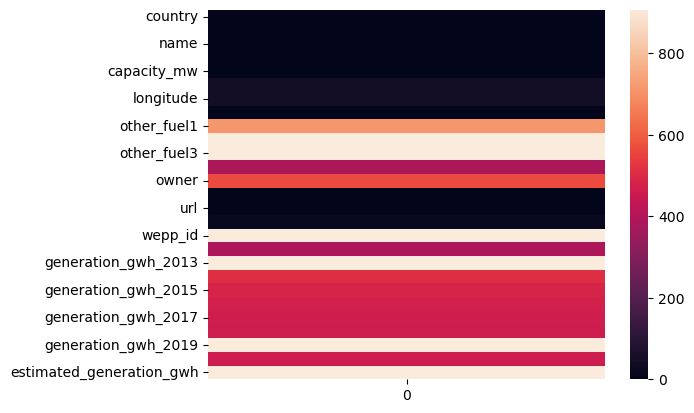

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

# Data processing

In [8]:
#Finding percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
estimated_generation_gwh             907      100.000000
other_fuel3                          907      100.000000
wepp_id                              907      100.000000
generation_gwh_2013                  907      100.000000
generation_gwh_2019                  907      100.000000
other_fuel2                          906       99.889746
other_fuel1                          709       78.169791
owner                                565       62.293275
generation_gwh_2014                  509       56.119074
generation_gwh_2015                  485       53.472988
generation_gwh_2016                  473       52.149945
generation_gwh_2017                  467       51.488423
generation_gwh_2018                  459       50.606395
generation_data_source               458       50.496141
year_of_capacity_data                388       42.778390
commissioning_year                   380       41.896362
latitude                       

Comment - We can see from above These (estimated_generation_gwh, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, other_fuel2, other_fuel1) columns have almost 100% data is missing and (owner) missing 62% of Data.  So we need to drop it.

## Removing Irrelevant columns

In [9]:
df.drop(columns=['estimated_generation_gwh', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019',
                 'other_fuel2', 'other_fuel1','owner'],axis=1,inplace=True)

In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Comment -
In this DataFrame [country, country_long,url] are not more useful, Because these columns contain same data and (url) useless data.

In [11]:
df.drop(columns=['country', 'country_long','url'],axis=1,inplace=True)

#### [generation_data_source,year_of_capacity_data,geolocation_source]- 
These columns contain single data or some of the values are absent so we need to drop it. Because all 3 columns are not relevent for this model.

In [12]:
df.drop(columns=['generation_data_source','year_of_capacity_data','geolocation_source'],axis=1,inplace=True)

In [13]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [14]:
# Name of column have unique value. that is not useful for Dataset.
df.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

In [15]:
df.shape

(907, 11)

### Filling Null values with Zero(0).

In [16]:
# cols is a list of column names where  to replace NaN with zero
cols = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

# Replace NaN with zero in specific column
df[cols] = df[cols].fillna(0)

In [17]:
# ('latitude','longitude') both columns is fill with columns mean value
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [18]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,0.000000,0.000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,0.000000,0.000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,Wind,NaN,CDM,0.000000,0.000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


<Axes: >

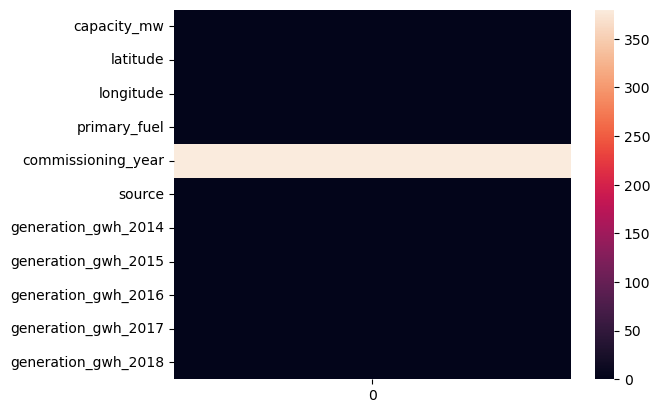

In [19]:
sns.heatmap(df.isnull().sum().to_frame())

### Comment -
Now we can see that above graph 📊 Dataset have no Nulls

# =============================================================

# Exploratory Data Analysis (EDA)

### Univariate Analysis

In [20]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Text(0.5, 1.0, 'Fuel')

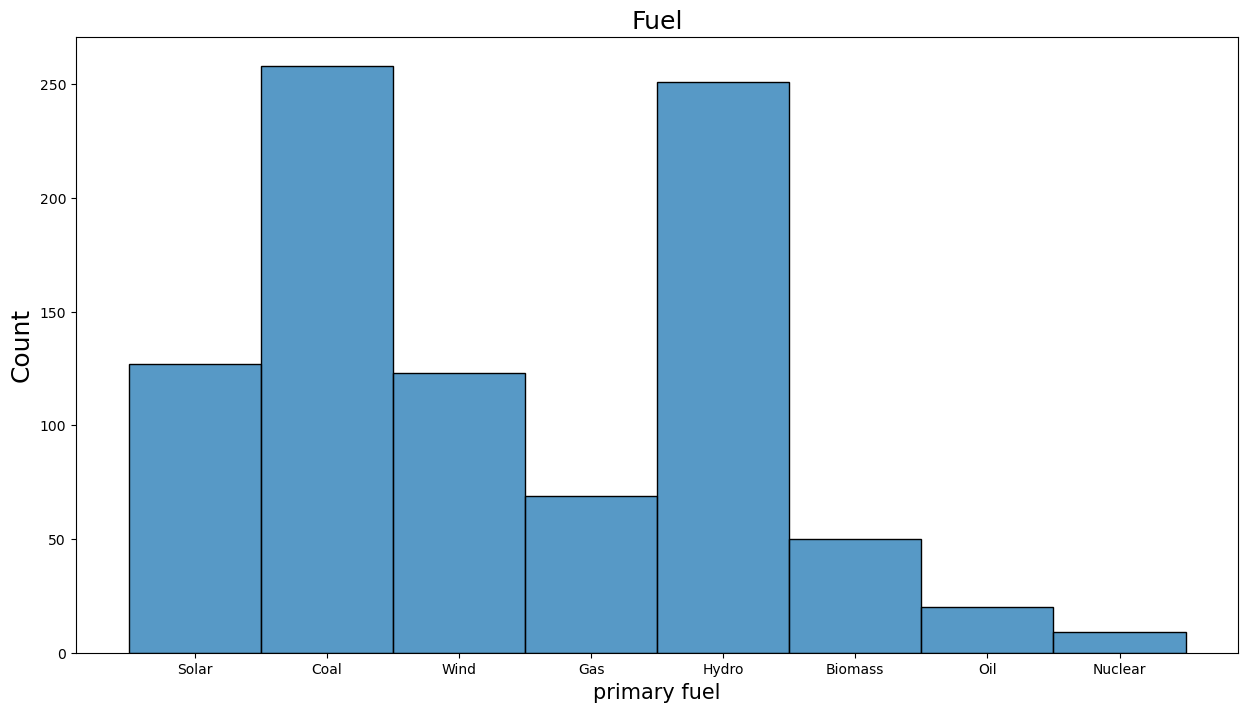

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(df['primary_fuel'])
plt.xlabel('primary fuel', fontsize=15 )
plt.ylabel('Count', fontsize=18 )
plt.title('Fuel', fontsize=18)

## Comment- 
* Coal and Hydro Fuel are primary used in power plant.
* Solar & Wind averagly used in power plant.
* Nuclear fuel is very less used in power plant

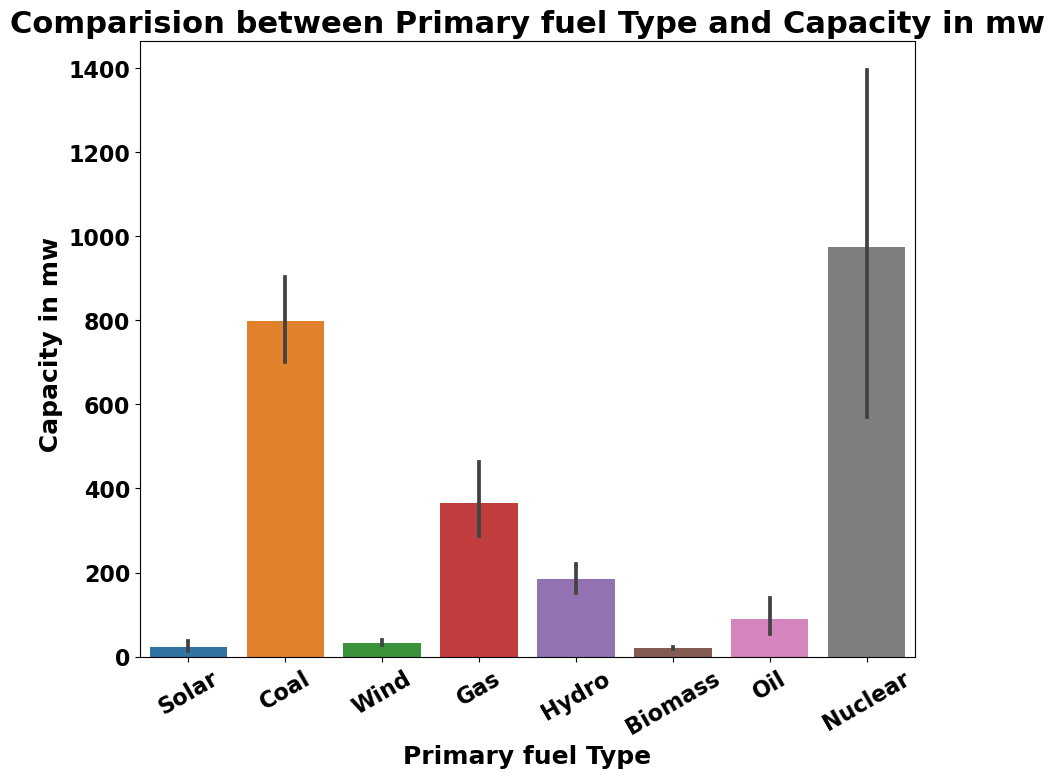

In [22]:
#Lets check the relation  primary_fuel Vs  capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel(' Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

Comment -
* High MegaWatt Energy generation  By  Nuclear fuel and it is very efficient.
* And 2nd highest MegaWatt Energy generation by Coal fuel.

In [23]:
# energy generated by Fuel type.
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


In [24]:
# Total energy used in India.
print('Total Power Generation Capacity of all Power Plants :',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants : 295884.946 MW


### Total Power Generation in India : 295884.946 MW

# Label Encoding of Target Column

In [25]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['primary_fuel']=encode.fit_transform(df['primary_fuel'])

In [26]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,0.000000,0.000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,NaN,Ultratech Cement ltd,0.000000,0.000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,NaN,CDM,0.000000,0.000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


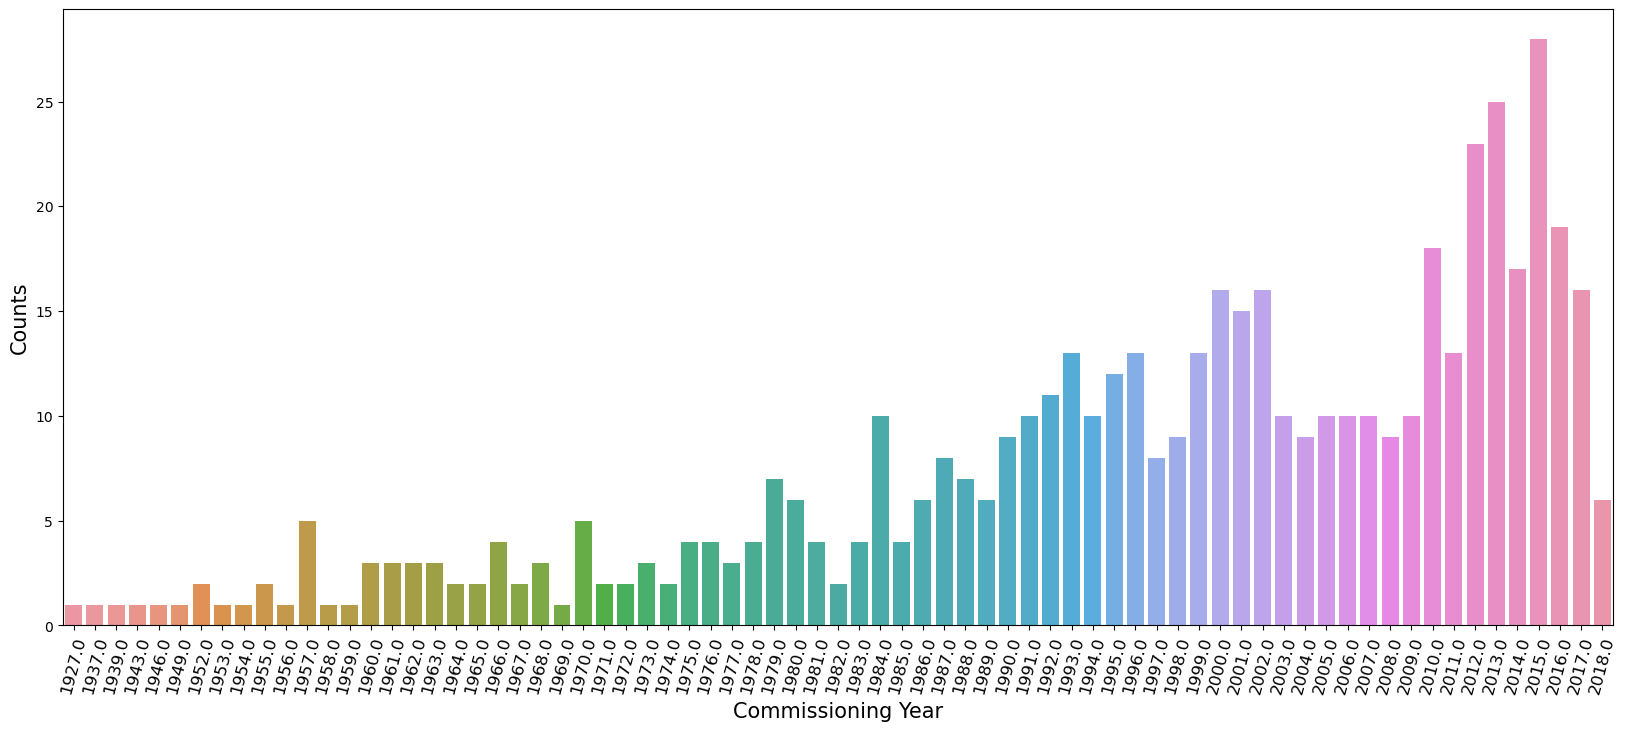

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='commissioning_year')
plt.xlabel('Commissioning Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(rotation=75, fontsize=12)
plt.show()

Comment -
* Here we can see first power plant in India starts in 1927.  
* The count is very low till 1956.  
* From 1952 to 1983 there is contineous developmet of 3 to 5 power plant every year.  
* The number increases 1960 with total count of 10.  
* In the year 2013 we have maximum number of Power plant, the count is more than 25.  

In [28]:
# (commissioning_year) this column contain year so Nan value replace with zero'
df['commissioning_year'] = df['commissioning_year'].fillna(0)

In [29]:
#Source is not more  useful.
df.drop(columns=['source'],axis=1,inplace=True)

## Bivariate Analysis

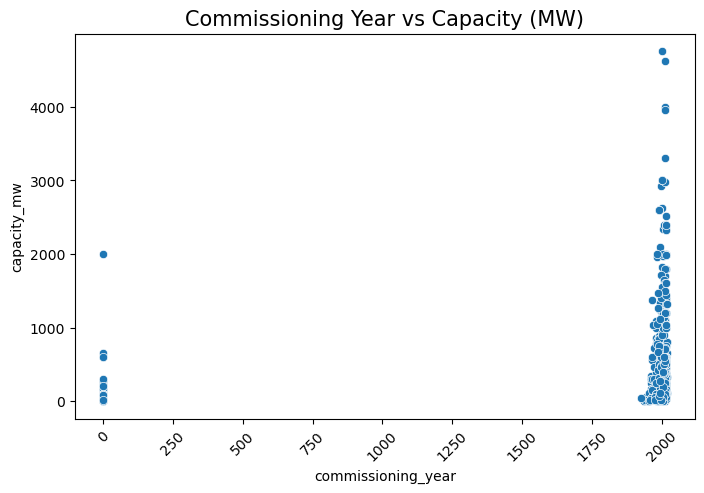

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='commissioning_year', y='capacity_mw')
plt.title('Commissioning Year vs Capacity (MW)', fontsize=15)
plt.xticks(rotation=45)  
plt.show()

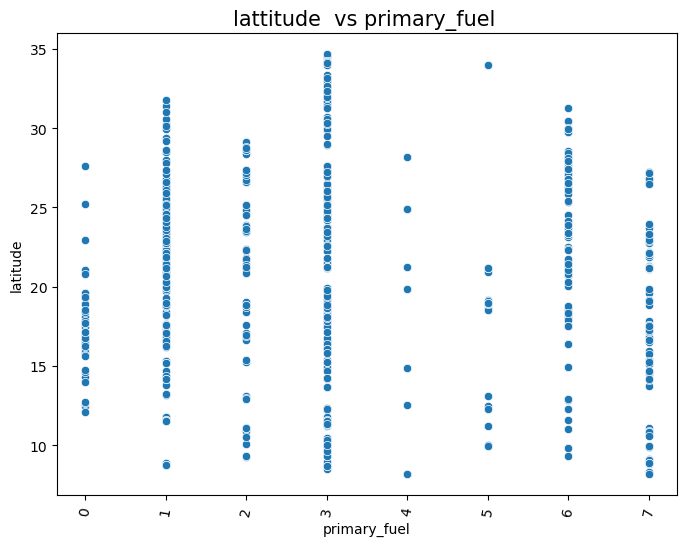

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='latitude',x='primary_fuel')
locs, labels = plt.xticks()
plt.title('lattitude  vs primary_fuel ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

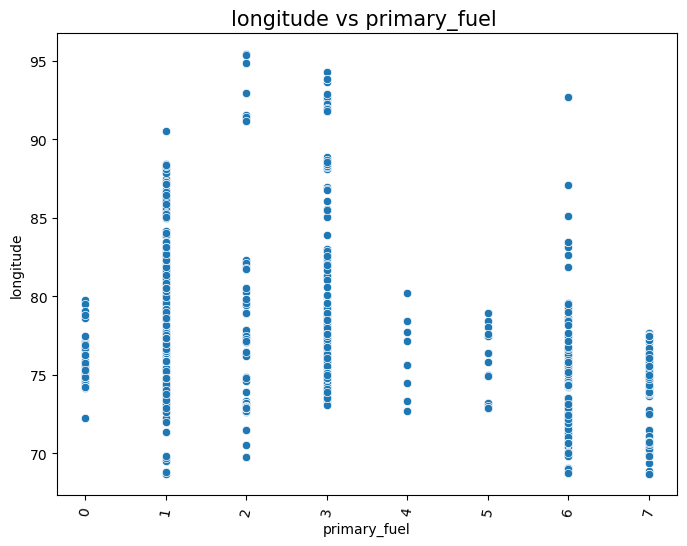

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='longitude',x='primary_fuel')
locs, labels = plt.xticks()
plt.title('longitude vs primary_fuel ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

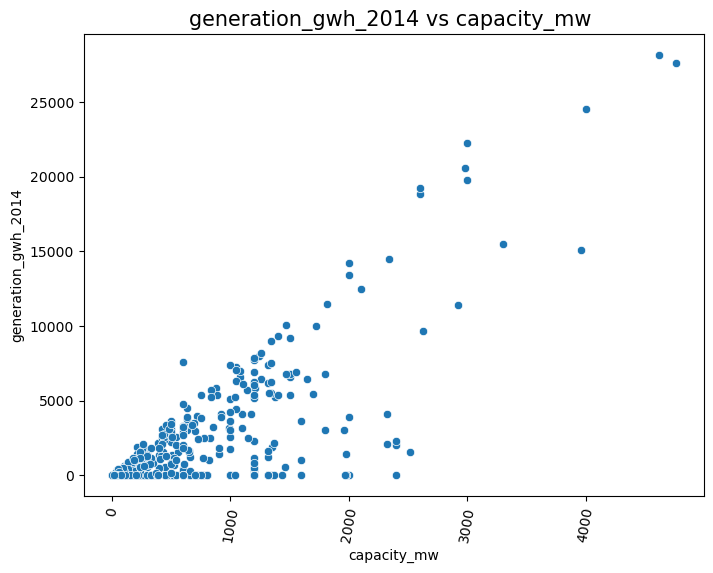

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='generation_gwh_2014',x='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

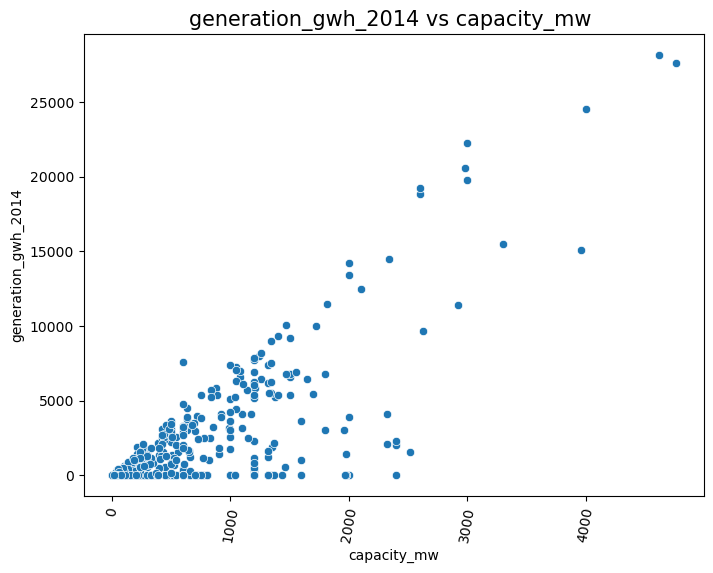

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, y='generation_gwh_2014',x='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels,rotation=80)
plt.show()

## Multivariate Analysis

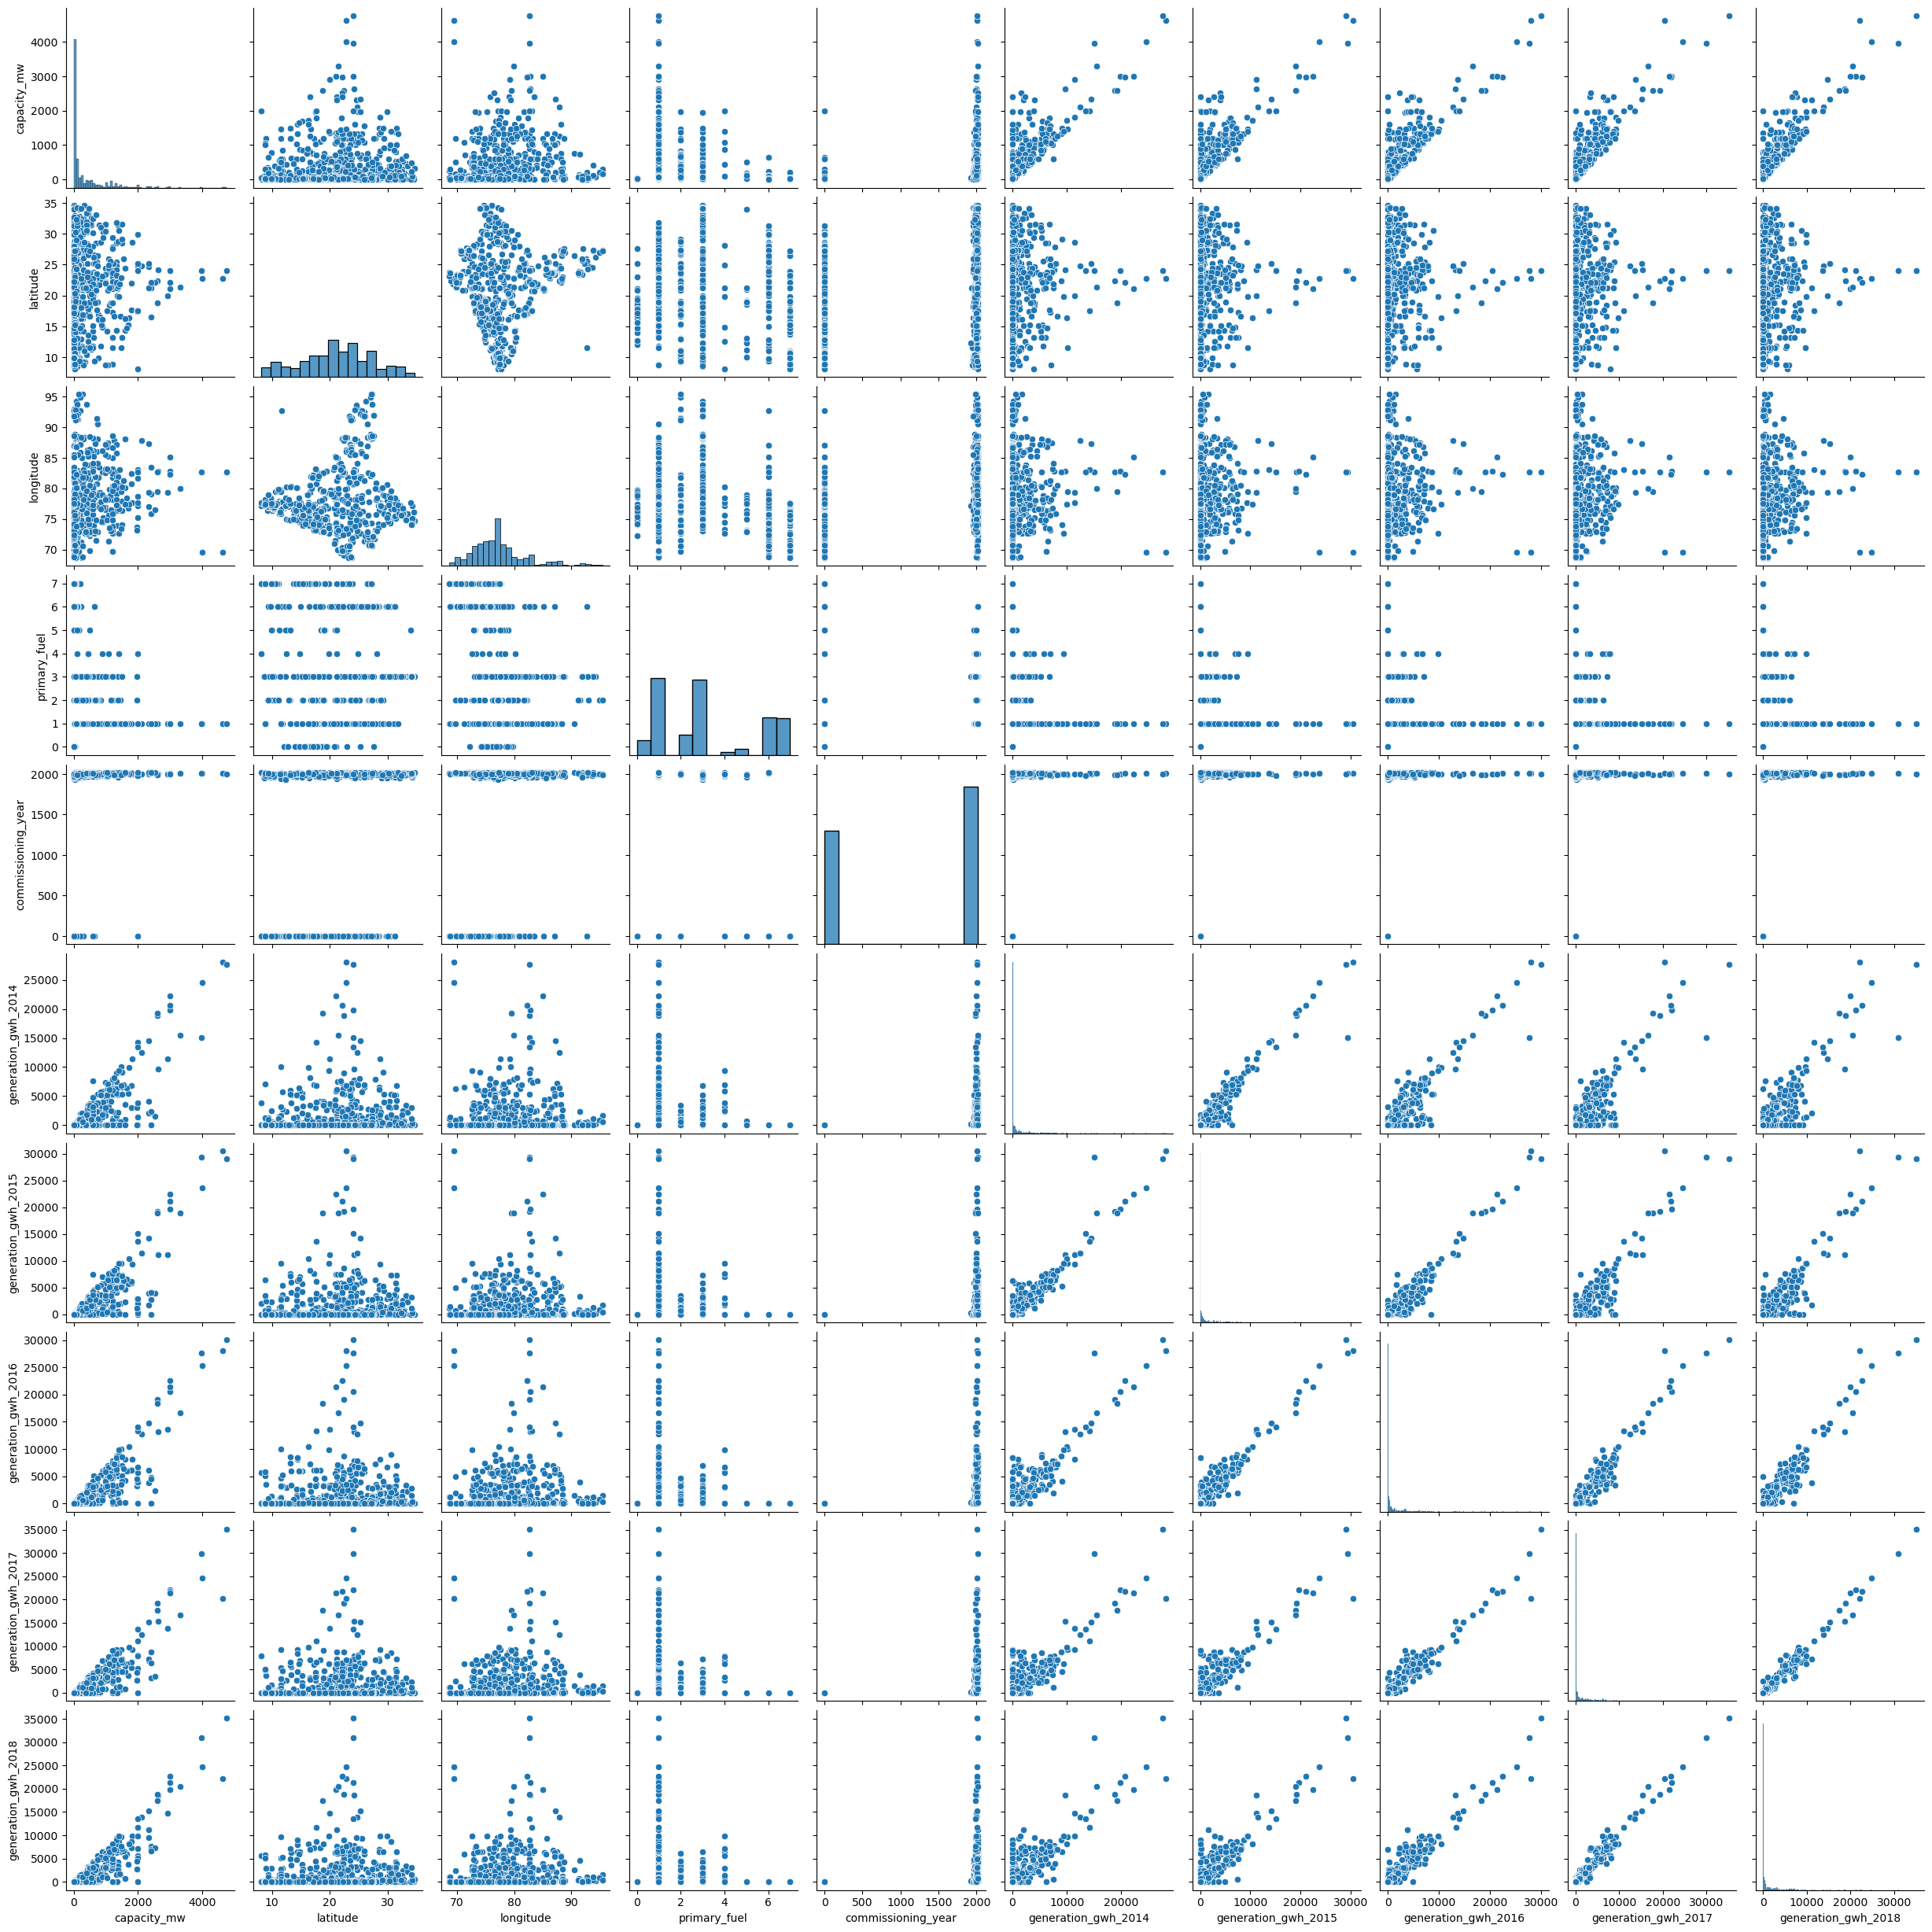

In [35]:
sns.pairplot(df)
plt.show()

Comment -
* primary_fuel: Mostly Coal is used  as primary fuel.  
* commissioning_year: we can see capacity incerases after 2000.  
* generation_gwh_2013 to eneration_gwh_2017: we can see generation growth is almost same for every year.

# Statistical Analysis

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.7250,59.2000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.0720,21.2818,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.3889,76.9792,79.206100,95.408
primary_fuel,907.0,3.206174,2.280652,0.0000,1.0000,3.0000,6.000000,7.000
commissioning_year,907.0,1160.382580,985.973139,0.0000,0.0000,1978.0000,2003.000000,2018.000
generation_gwh_2014,907.0,1067.106713,2926.078576,0.0000,0.0000,0.0000,556.562750,28127.000
generation_gwh_2015,907.0,1129.781446,3105.552487,0.0000,0.0000,0.0000,598.926350,30539.000
generation_gwh_2016,907.0,1180.909147,3131.100641,0.0000,0.0000,0.0000,670.039394,30015.000
generation_gwh_2017,907.0,1235.958207,3187.208175,0.0000,0.0000,0.0000,709.290725,35116.000
generation_gwh_2018,907.0,1284.630911,3298.251107,0.0000,0.0000,0.0000,687.754000,35136.000


Comment - There is high potential that exitance of outlier in dataset.

## Correlation between Data

<Axes: >

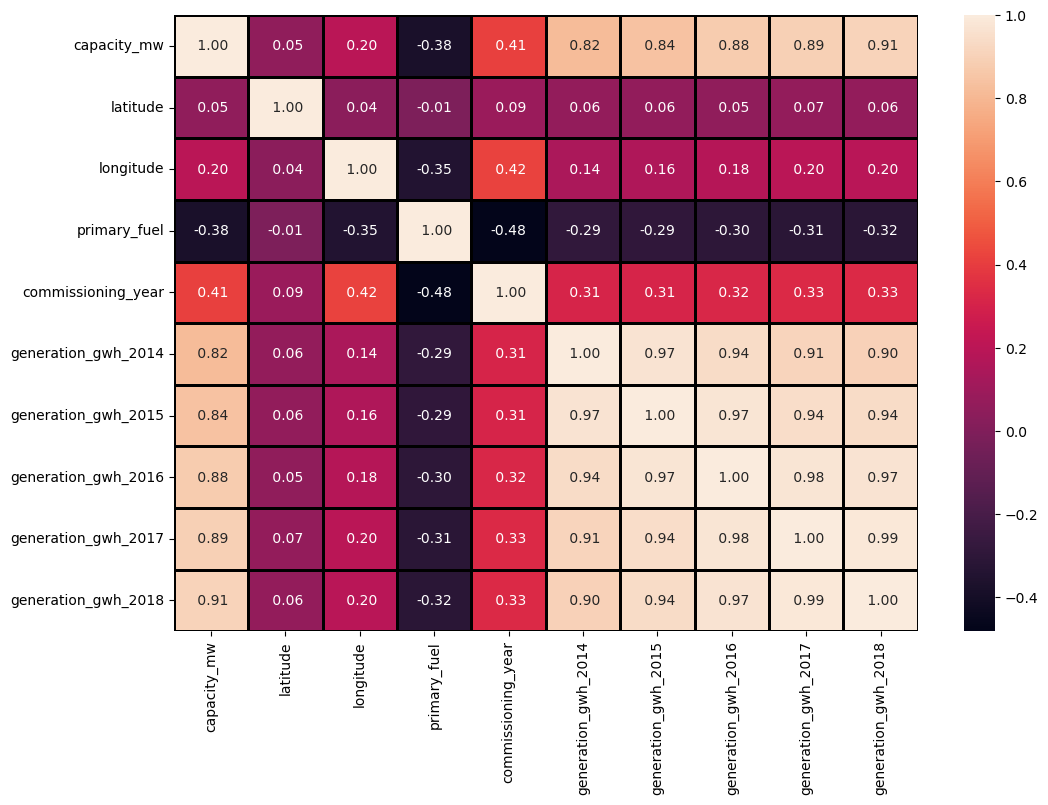

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

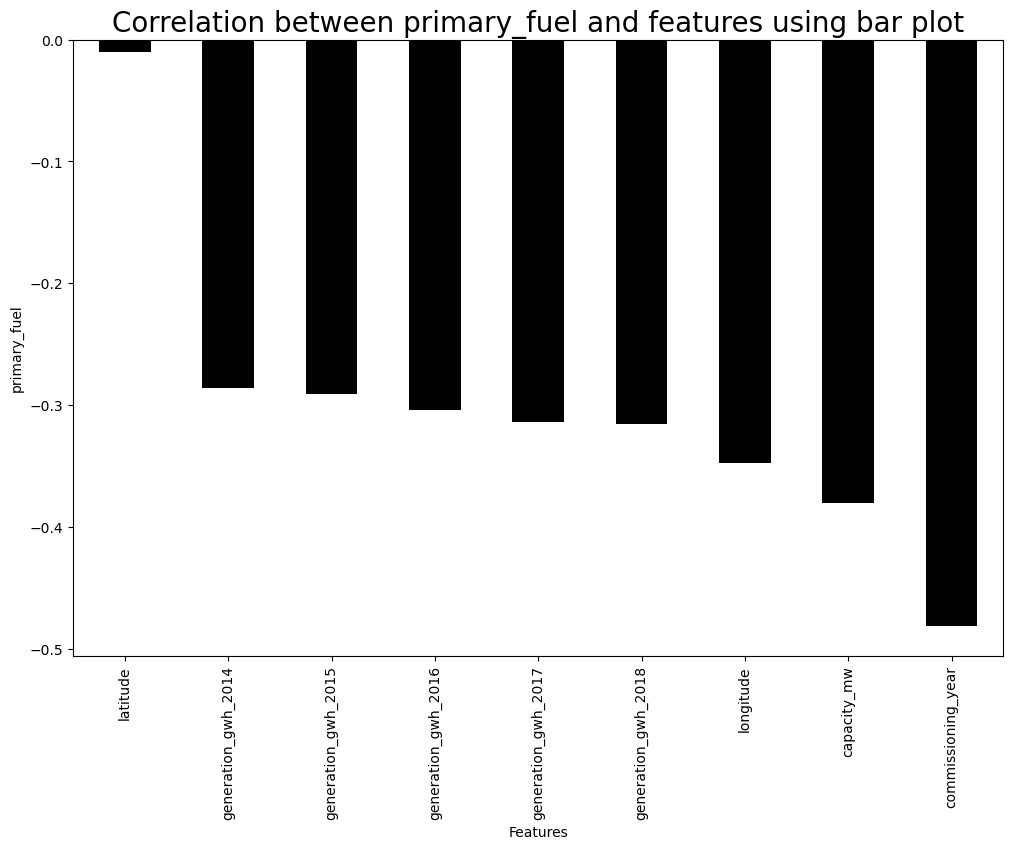

In [38]:
plt.figure(figsize=(12,8))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='k')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

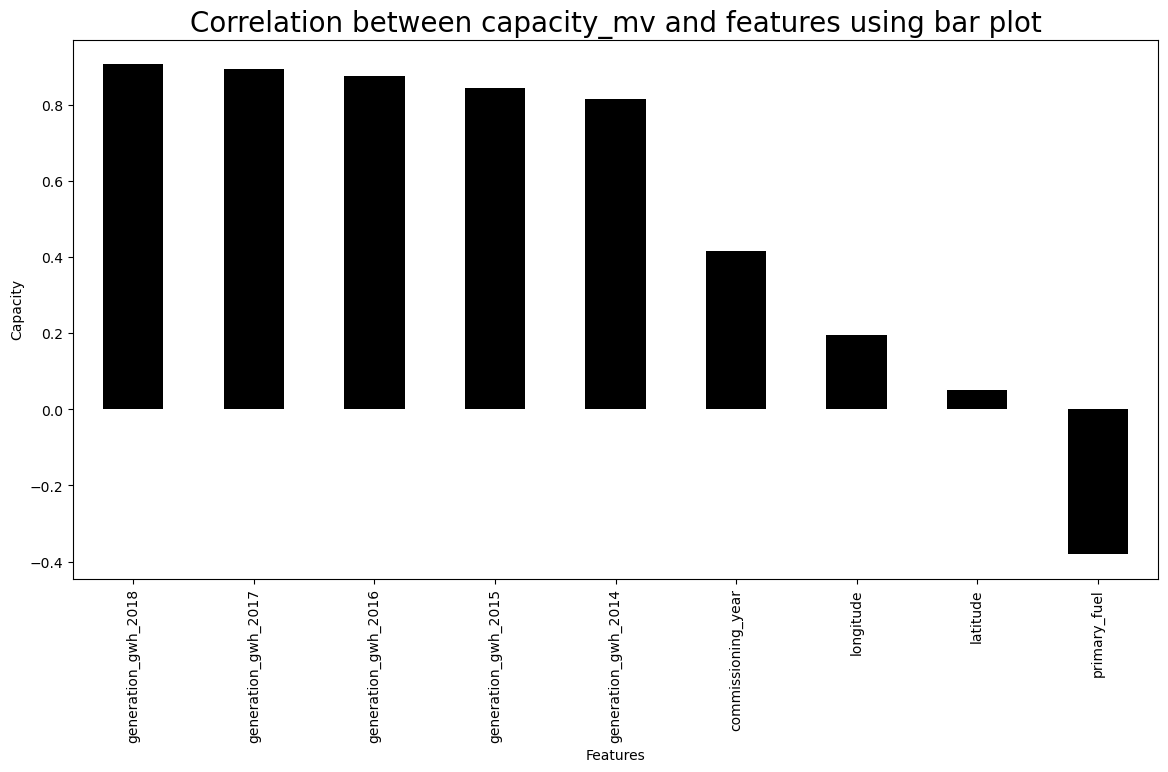

In [39]:
plt.figure(figsize=(14,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='k')
plt.xlabel('Features', fontsize=10)  # Corrected xlabel
plt.ylabel('Capacity', fontsize=10)
plt.title('Correlation between capacity_mv and features using bar plot', fontsize=20)
plt.show()

Comment- 
* we can analyse correlation between capacity Vs features and primary_fuel Vs features.
* primary_fuel is negativey correlated to megawatt_capacity.

# Outlier Detection

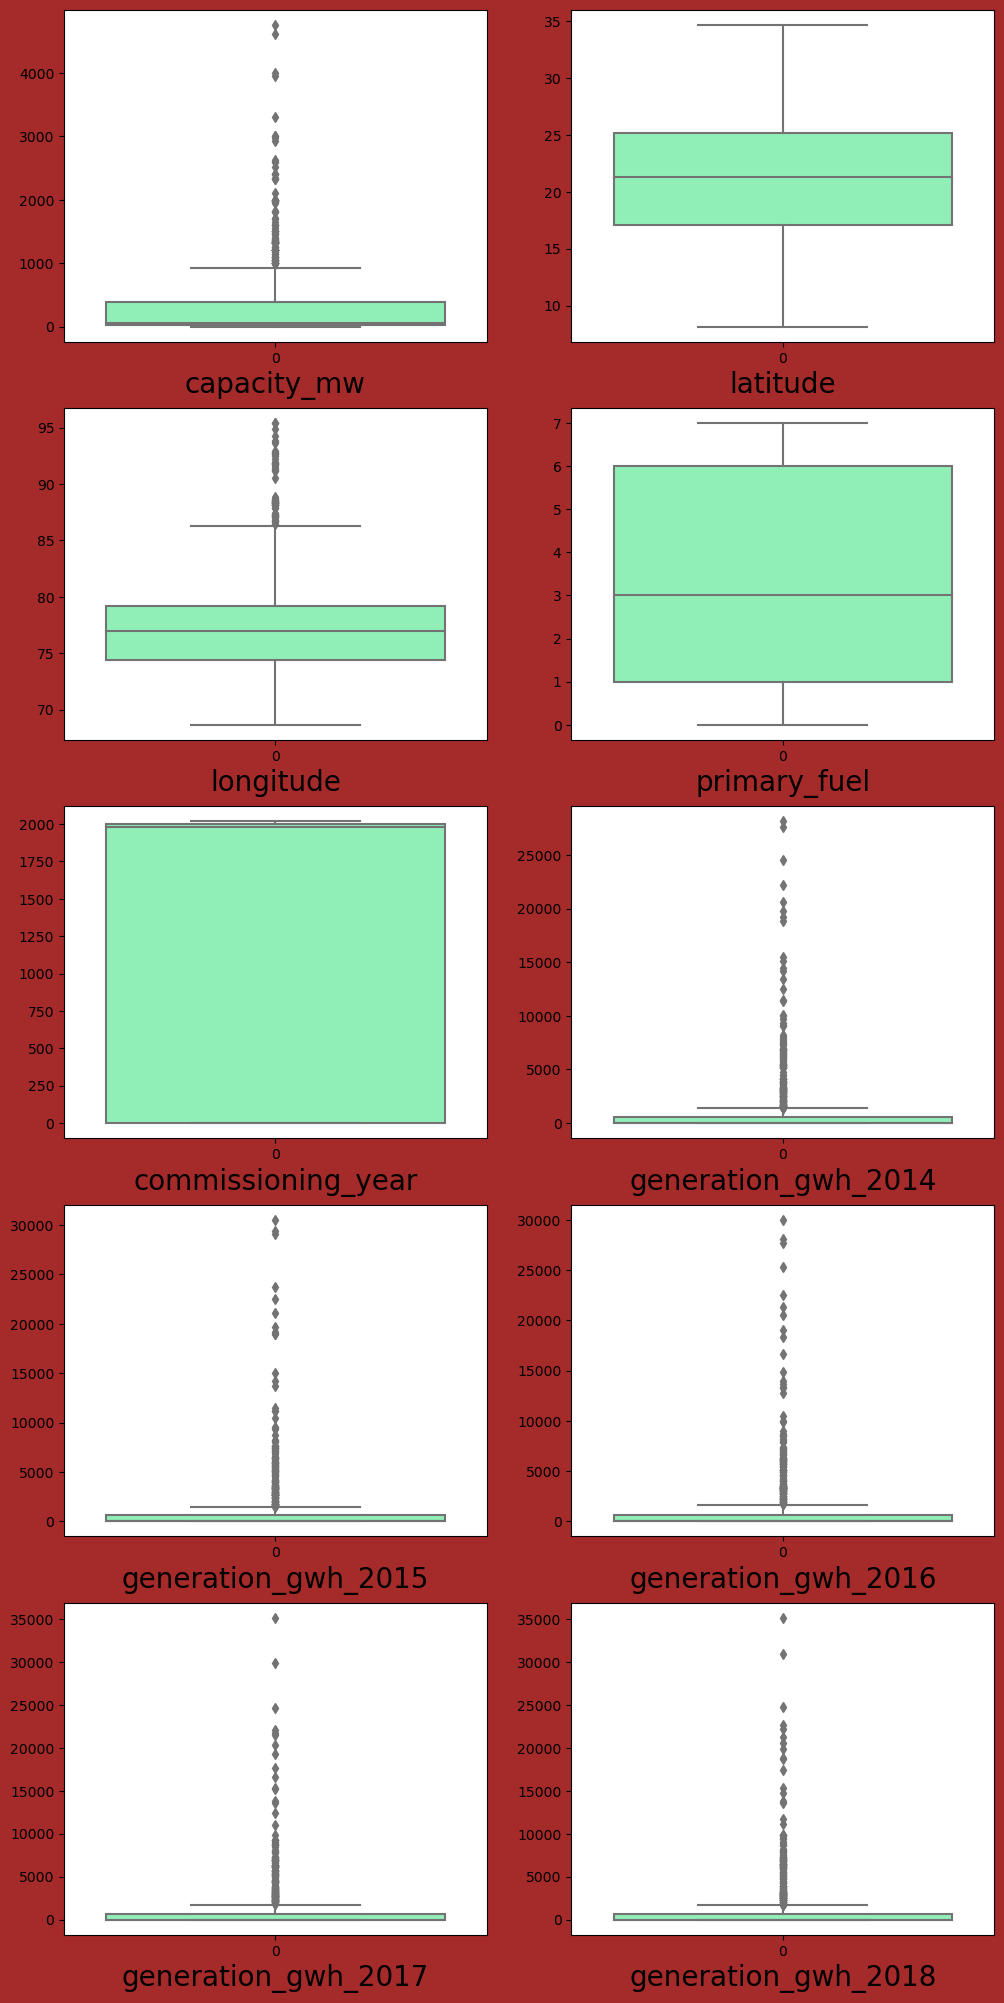

In [40]:
plt.figure(figsize=(12,25),facecolor='brown')
index=1
for column in df:
    if index <=11:
        ax = plt.subplot(5,2,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

comment-
* Here we can see boxplot indicates that we have outliers, these are present mostly in generation_gwh and capacity_mv columns. 

# Removing of Outliers

In [41]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = ['capacity_mw', 'longitude', 
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (e.g., 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [42]:
#Shape after removing outliers
print('Shape of dataset after removing outliers :', df.shape)

Shape of dataset after removing outliers : (907, 10)


# Checking Skewness of Dataset

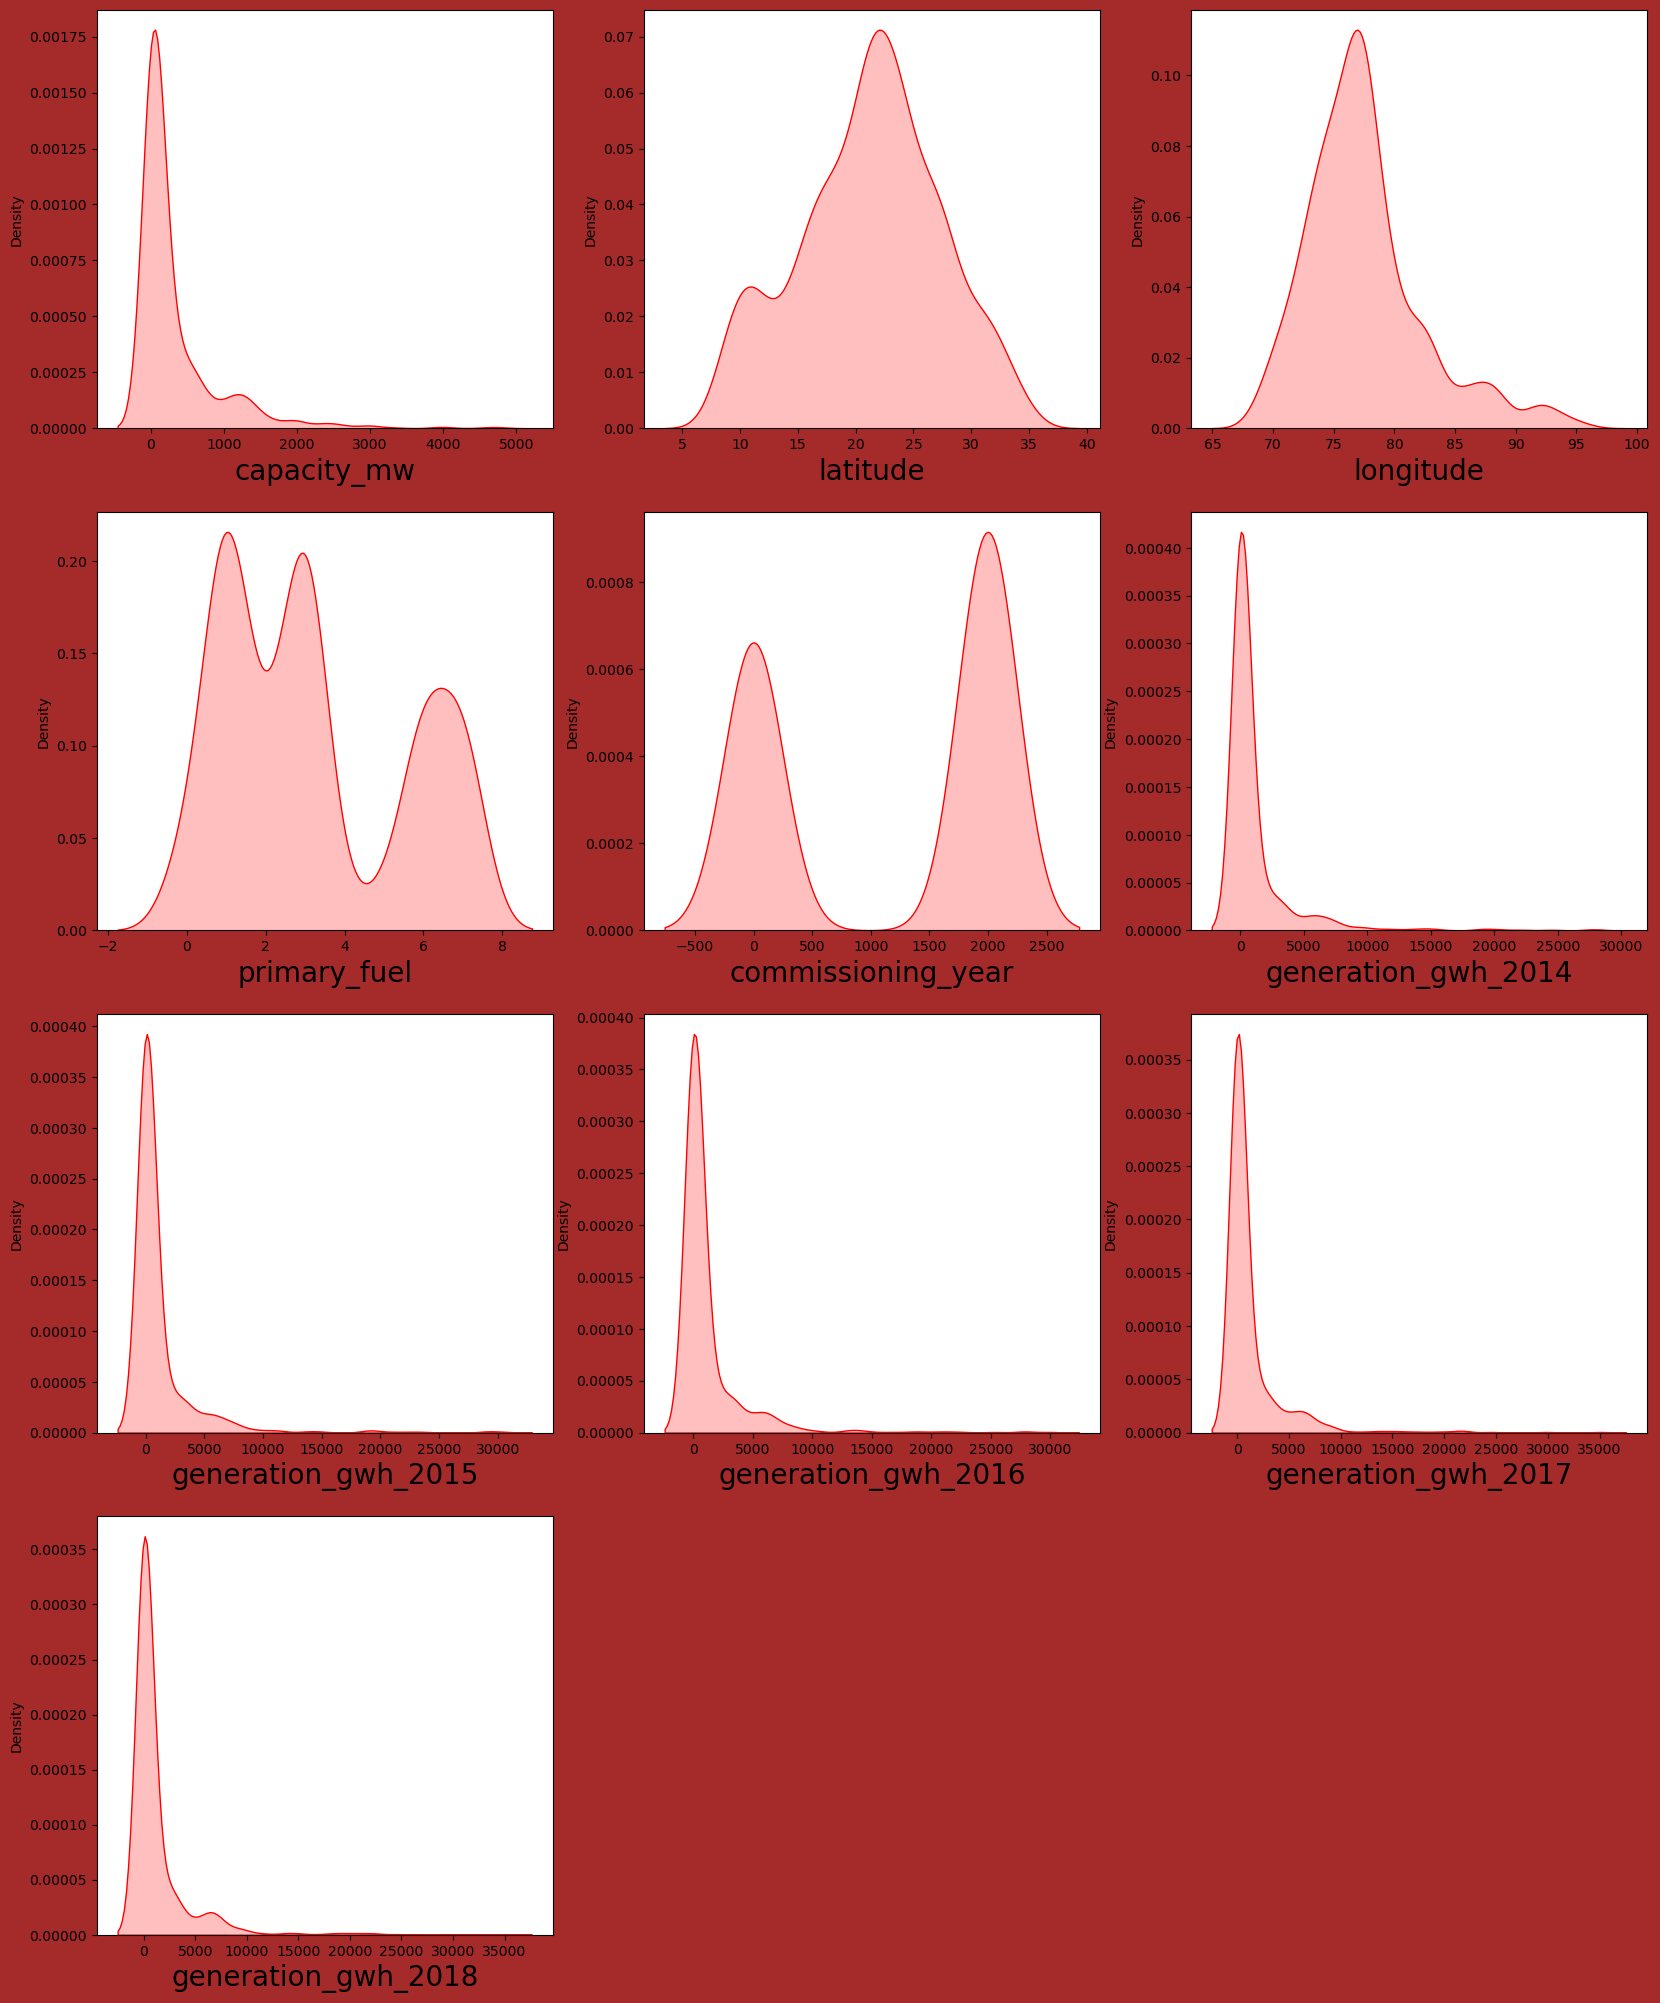

In [43]:
plt.figure(figsize=(20,25), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [44]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -0.328505
generation_gwh_2014    4.986588
generation_gwh_2015    5.260778
generation_gwh_2016    4.984874
generation_gwh_2017    4.979870
generation_gwh_2018    4.846091
dtype: float64

comment -
* Optimal range for skewness is -0.5 to 0.5.
* All skewed columns are Right Skewed.

# Removing skewness from dataset

In [45]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [227]:
df.skew()

capacity_mw           -0.022185
latitude              -0.149698
longitude             -0.001006
primary_fuel           0.472251
commissioning_year    -0.328505
generation_gwh_2014    0.411779
generation_gwh_2015    0.323089
generation_gwh_2016    0.282406
generation_gwh_2017    0.273553
generation_gwh_2018    0.317200
dtype: float64

# Varience-inflation-factor (VIF)

In [46]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif

,VIF,Features
0,2.027516,capacity_mw
1,6.098934,latitude
2,1.337934,longitude
3,3.556359,primary_fuel
4,4.837326,commissioning_year
5,7.748943,generation_gwh_2014
6,16.155563,generation_gwh_2015
7,23.856715,generation_gwh_2016
8,36.024576,generation_gwh_2017
9,26.057264,generation_gwh_2018


In [47]:
# spliting Dataset
X = df.drop(columns = ["capacity_mw"])
y = df["capacity_mw"]

# Principal Component Analysis.
* PCA is a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables (principal components).
* Implementing PCA can help address multicollinearity.

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca= pca.fit_transform(X)

In [57]:
X_=pd.DataFrame(X_pca,columns=np.arange(9))

* variables with high VIF (typically VIF > 5 or 10), you may consider removing one of the highly correlated variables to address multicollinearity.


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,latitude,1.0
1,longitude,1.0
2,primary_fuel,1.0
3,commissioning_year,1.0
4,generation_gwh_2014,1.0
5,generation_gwh_2015,1.0
6,generation_gwh_2016,1.0
7,generation_gwh_2017,1.0
8,generation_gwh_2018,1.0


* Multicollinearity problem is shorted.

# Machine Learning Model Building

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [60]:
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)

## DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [71]:
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

# Evaluate the model using regression metrics
r2 = r2_score(y_test, pred)

print("R-squared:", r2*100)

R-squared: 68.41954771846787


In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)

MAE : 195.59554645354643
RMSE : 408.91441771123635


# KNeighborsRegressor

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor()

In [74]:
knn.fit(X_train, y_train)

pred1 = knn.predict(X_test)

# Evaluate the model using regression metrics
R2 = r2_score(y_test, pred1)

print("R-squared:", R2*100)

R-squared: 37.429007232428646


In [77]:
mse1 = mean_squared_error(y_test,pred1)
rmse1 = np.sqrt(mse)
mae1 = mean_absolute_error(y_test,pred1)
print("MAE :", mae1)
print("RMSE :", rmse1)

MAE : 267.85678461538464
RMSE : 408.91441771123635


# RandomForestRegressor

In [121]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(i)
rfr.fit(X_train, y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(y_test, pred2)

print("R-squared:", R3*100)

R-squared: 75.13278701751209


In [100]:
mse2 = mean_squared_error(y_test,pred2)
rmse2 = np.sqrt(mse)
mae2 = mean_absolute_error(y_test,pred2)
print("MAE :", mae2)
print("RMSE :", rmse2)

MAE : 158.42291278711696
RMSE : 408.91441771123635


# XGB Regressor Model

In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [97]:
xgb.fit(X_train, y_train)

pred3 = xgb.predict(X_test)

# Evaluate the model using regression metrics
R4 = r2_score(y_test, pred3)

print("R-squared:", R4*100)

R-squared: 78.95171312446313


In [98]:
mse3 = mean_squared_error(y_test,pred3)
rmse3 = np.sqrt(mse)
mae3 = mean_absolute_error(y_test,pred3)
print("MAE :", mae3)
print("RMSE :", rmse3)

MAE : 145.0545299217596
RMSE : 408.91441771123635


# GradientBoostingRegressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [118]:
gbr.fit(X_train, y_train)

pred4 = gbr.predict(X_test)

# Evaluate the model using regression metrics
R5 = r2_score(y_test, pred4)

print("R-squared:", R5*100)

R-squared: 75.75569385676457


In [119]:
mse4 = mean_squared_error(y_test,pred4)
rmse4 = np.sqrt(mse)
mae4 = mean_absolute_error(y_test,pred4)
print("MAE :", mae4)
print("RMSE :", rmse4)

MAE : 164.15815199228317
RMSE : 408.91441771123635


# CrossValidation  of Model

In [120]:
model=[DecisionTreeRegressor(),
       KNeighborsRegressor(),
       RandomForestRegressor(),
       XGBRegressor(),
        GradientBoostingRegressor()]

for m in model:
    score = cross_val_score(m, X, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score DecisionTreeRegressor() :

Score : [0.76236253 0.59984318 0.81400959 0.7319683  0.79359965]
Mean Score : 0.7403566517794883
Std deviation : 0.07557543149793501




Cross Validation Score KNeighborsRegressor() :

Score : [0.10331859 0.38793225 0.36636859 0.38820209 0.54957109]
Mean Score : 0.35907852295827974
Std deviation : 0.1438293639332519




Cross Validation Score RandomForestRegressor() :

Score : [0.85425911 0.83110342 0.83663532 0.85924981 0.88291735]
Mean Score : 0.852833001469009
Std deviation : 0.018345664392920874




Cross Validation Score XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,


# Hyper Parameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameter = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Instantiate GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), parameter, 
                            verbose=2)
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END ma

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [132]:
# Get the best parameters
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [136]:
Final_model = RandomForestRegressor(max_depth= 20, min_samples_leaf=1,
                                 min_samples_split=2,
                                   n_estimators=300)
Final_model.fit(X_train,y_train)
f_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', r2_score(y_test, f_pred))

Accuracy Score :
 0.7615797972370312


# Prediction Based  on Model

In [140]:
prediction=pd.DataFrame({'predicted values':f_pred,'actual values':y_test})
prediction

,predicted values,actual values
1,46.196864,98.0
436,6.871452,2.1
742,722.053617,500.0
695,2995.600000,3960.0
342,108.378875,41.4
...,...,...
873,506.449427,388.5
53,173.773957,30.0
455,1134.380000,1050.0
641,376.736133,600.0


# Model Saving

In [141]:
import joblib
joblib.dump(Final_model,'Globl_Powerplant.pkl')

['Globl_Powerplant.pkl']

# ==========================THANKS==========================